In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Influencer.csv')

In [ ]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [ ]:
df.isna().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [ ]:
df['Channel Info']=df['Channel Info'].apply(lambda x:x.replace('\n',''))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [ ]:
#Question 1 - Correlation coefficient

In [ ]:
cc=df.copy()
cc.dropna(inplace=True)

In [ ]:
cc['Followers']=cc['Followers'].replace({'m':'*1e6'},regex=True).map(pd.eval).astype('int')
cc['Avg. Likes']=cc['Avg. Likes'].replace({'k':'*1e3','m':'*1e6'},regex=True).map(pd.eval).astype('int')
cc['Total Likes']=cc['Total Likes'].replace({'b':'*1e9','m':'*1e6'},regex=True).map(pd.eval).astype('int')
cc['Posts']=cc['Posts'].replace({'k':'*1e3'},regex=True).map(pd.eval).astype('int')
cc['New Post Avg. Likes']=cc['New Post Avg. Likes'].replace({'k':'*1e3','m':'*1e6'},regex=True).map(pd.eval).astype('int')

In [ ]:
heatmap_data=cc.corr()

<Axes: >

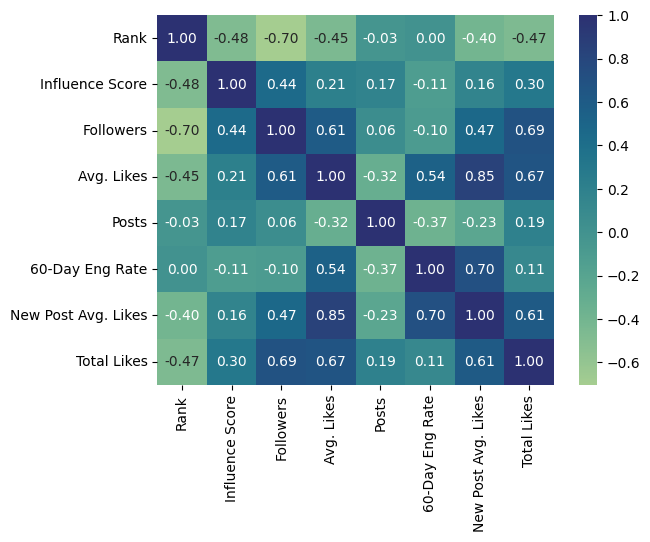

In [ ]:
sns.heatmap(heatmap_data, cmap='crest', annot=True, fmt='.2f')

In [ ]:
#Question 2 - Frequency Distribution

In [ ]:
fd=df.copy()

<Axes: >

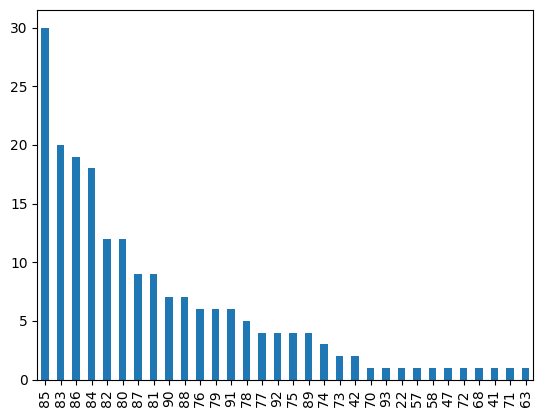

In [ ]:
fd['Influence Score'].value_counts().plot(kind='bar')

In [ ]:
fd['Followers'].value_counts()

36.0m    3
33.6m    3
68.1m    3
33.8m    3
52.9m    3
        ..
64.7m    1
64.4m    1
63.6m    1
63.4m    1
33.4m    1
Name: Followers, Length: 172, dtype: int64

In [ ]:
fd['Posts'].value_counts()

10.0k    11
1.2k      9
1.9k      5
2.0k      5
9.9k      4
         ..
899       1
290       1
10.1k     1
8.2k      1
3.8k      1
Name: Posts, Length: 121, dtype: int64

In [ ]:
#Question 3 - Country with highest number of influencer

In [ ]:
grouping=df.copy()
grouping.dropna(inplace=True)

<BarContainer object of 25 artists>

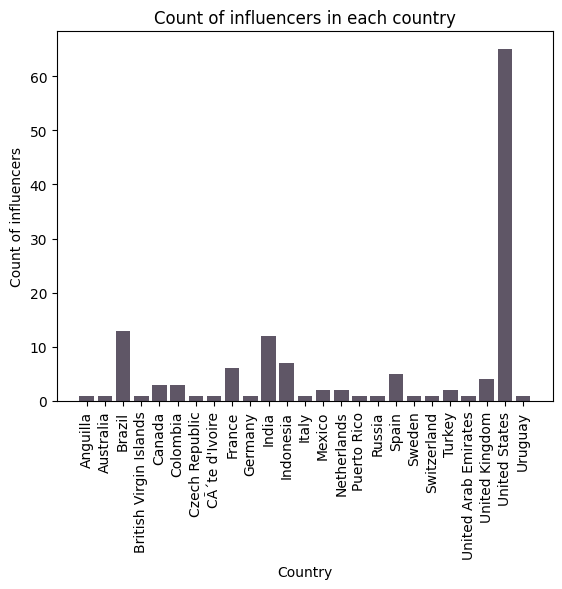

In [ ]:
grouped_countries=grouping.groupby('Country Or Region').size().reset_index(name='Count')
plt.xlabel('Country')
plt.ylabel('Count of influencers')
plt.xticks(rotation=90)
plt.title('Count of influencers in each country')
plt.bar(grouped_countries['Country Or Region'],grouped_countries['Count'],color='#5f5666')

In [ ]:
#Question 4 - Top 10 influencers

In [ ]:
top_10=df.copy()

In [ ]:
top_10['Followers']=top_10['Followers'].replace({'m':'*1e6'},regex=True).map(pd.eval).astype('int')
top_10['Avg. Likes']=top_10['Avg. Likes'].replace({'k':'*1e3','m':'*1e6'},regex=True).map(pd.eval).astype('int')
top_10['Total Likes']=top_10['Total Likes'].replace({'b':'*1e9','m':'*1e6'},regex=True).map(pd.eval).astype('int')

In [ ]:
top_follower=top_10.sort_values(by='Followers',ascending=False).head(10)
top_follower[['Channel Info','Followers']]

,Channel Info,Followers
0,cristiano,485200000
1,kyliejenner,370700000
2,leomessi,363900000
3,selenagomez,348800000
4,therock,339400000
5,arianagrande,333000000
6,kimkardashian,330700000
7,beyonce,276100000
8,khloekardashian,273900000
9,justinbieber,260000000


<BarContainer object of 10 artists>

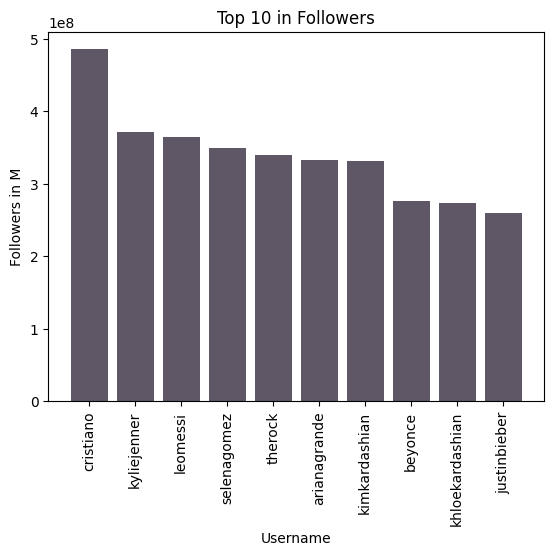

In [ ]:
plt.xlabel('Username')
plt.ylabel('Followers in M')
plt.xticks(rotation=90)
plt.title('Top 10 in Followers')
plt.bar(top_follower['Channel Info'],top_follower['Followers'],color='#5f5666')

In [ ]:
top_avg_like=top_10.sort_values(by='Avg. Likes',ascending=False).head(10)
top_avg_like[['Channel Info','Avg. Likes']]

,Channel Info,Avg. Likes
96,thv,15400000
131,j.m,14400000
165,rkive,10600000
0,cristiano,8700000
32,billieeilish,8400000
1,kyliejenner,8199999
2,leomessi,6700000
3,selenagomez,6100000
38,lalalalisa_m,6000000
22,zendaya,5900000


<BarContainer object of 10 artists>

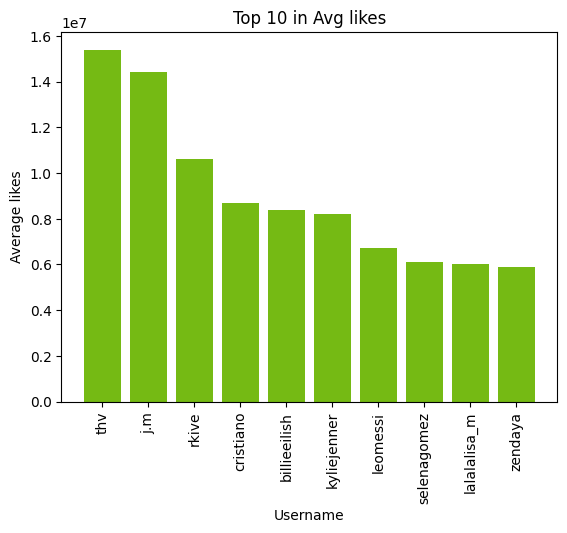

In [ ]:
plt.xlabel('Username')
plt.ylabel('Average likes')
plt.xticks(rotation=90)
plt.title('Top 10 in Avg likes')
plt.bar(top_avg_like['Channel Info'],top_avg_like['Avg. Likes'],color='#75ba14')

In [ ]:
top_total_like=top_10.sort_values(by='Total Likes',ascending=False).head(10)
top_total_like[['Channel Info','Total Likes']]

,Channel Info,Total Likes
1,kyliejenner,57400000000
0,cristiano,29100000000
22,zendaya,20800000000
6,kimkardashian,19800000000
5,arianagrande,18500000000
25,badgalriri,18000000000
19,neymarjr,14400000000
9,justinbieber,14000000000
16,nickiminaj,12900000000
4,therock,12600000000


<BarContainer object of 10 artists>

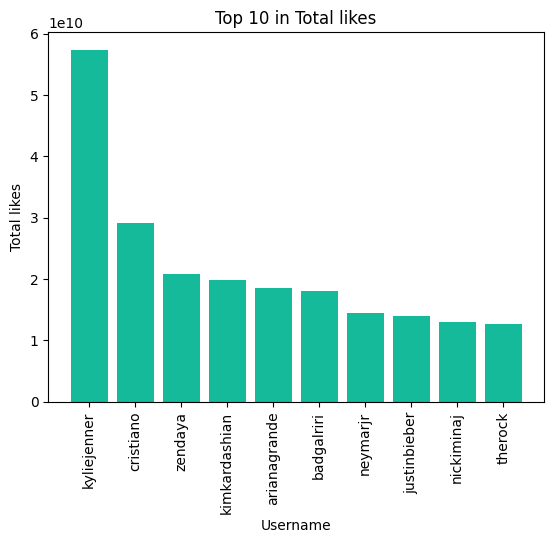

In [ ]:
plt.xlabel('Username')
plt.ylabel('Total likes')
plt.xticks(rotation=90)
plt.title('Top 10 in Total likes')
plt.bar(top_total_like['Channel Info'],top_total_like['Total Likes'],color='#14ba99')

In [ ]:
#Question 5 - Relation between pair of features

In [ ]:
pair=df.copy()
pair.dropna(inplace=True)

In [ ]:
pair['Followers']=pair['Followers'].replace({'m':'*1e6'},regex=True).map(pd.eval).astype('int')
pair['Avg. Likes']=pair['Avg. Likes'].replace({'k':'*1e3','m':'*1e6'},regex=True).map(pd.eval).astype('int')
pair['Total Likes']=pair['Total Likes'].replace({'b':'*1e9','m':'*1e6'},regex=True).map(pd.eval).astype('int')
pair['Posts']=pair['Posts'].replace({'k':'*1e3'},regex=True).map(pd.eval).astype('int')

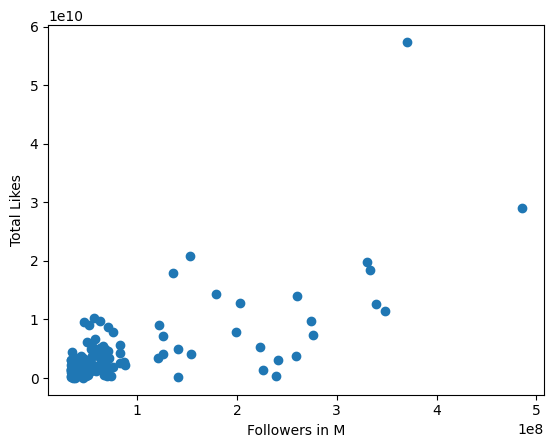

In [ ]:
plt.xlabel('Followers in M')
plt.ylabel('Total Likes')
plt.scatter(pair['Followers'],pair['Total Likes'])

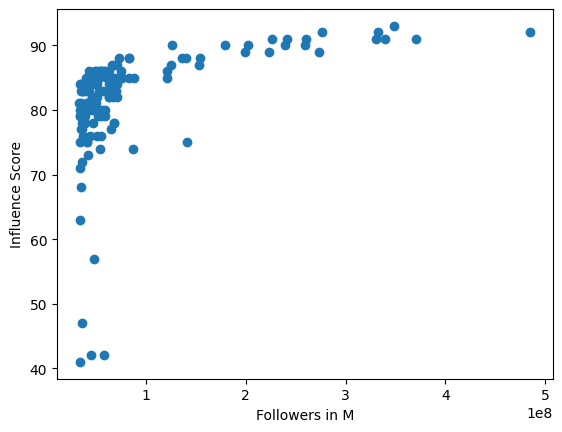

In [ ]:
plt.xlabel('Followers in M')
plt.ylabel('Influence Score')
plt.scatter(pair['Followers'],pair['Influence Score'])

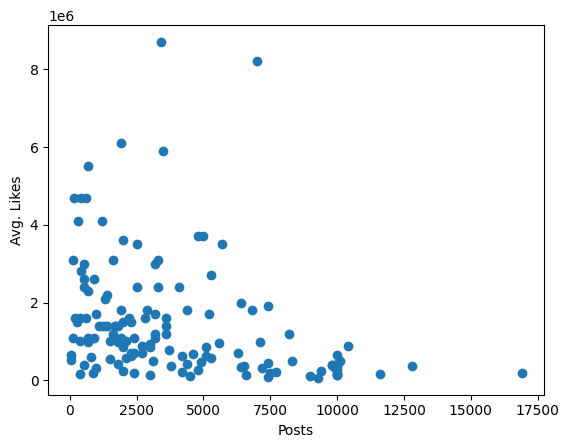

In [ ]:
plt.xlabel('Posts')
plt.ylabel('Avg. Likes')
plt.scatter(pair['Posts'],pair['Avg. Likes'])

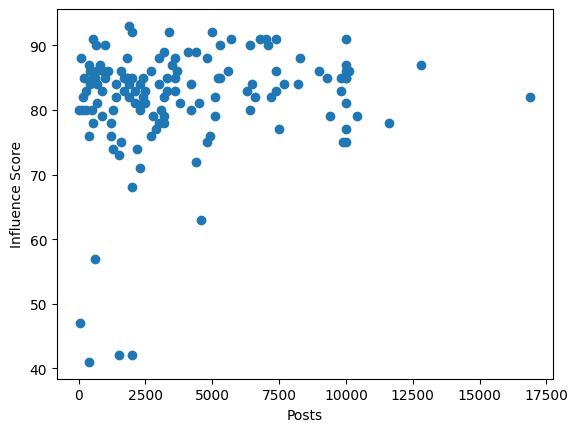

In [ ]:
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.scatter(pair['Posts'],pair['Influence Score'])